In [1]:
mcmc_resets = 1
mcmc_steps = 5000
mcmc_ens_avg=[4000,100]
log_flows = True
log_flows = True
#"""
XLABS = [
    'd',
    'm_o',
    'm_d']
params = 6


In [2]:
import pandas as pd
import numpy as np
import sys
import warnings
import gc
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from copy import deepcopy,copy
from ipywidgets import IntProgress
from itertools import chain
from IPython.display import display
from datetime import datetime
import pickle
import os
# Since the 'user' column do not have relevant information will not be read

# Import Machine Scientist
from importlib.machinery import SourceFileLoader
abs_path = os.path.abspath('')
path = f'{abs_path}/rguimera-machine-scientist/machinescientist.py'
ms = SourceFileLoader('ms', path).load_module()

# Read data
states=['New York','Massachusetts','California','Florida','Washington','Texas']


### Train/Test

In [3]:
name=open('./data/checkpoints/fold1_sample_dataframes_2022_11_02-02_54_03.pkl', "rb")
train_list_sample=pickle.load(name)
name.close()
fold='fold1'

### Computing natural logarithm of population flow

In [4]:
if log_flows==True:
    for i,key in enumerate(states):
        train_list_sample[states[i]]['total_pop_flow']=train_list_sample[states[i]]['total_pop_flow'].apply(lambda x : np.log(x))
        print(train_list_sample[states[i]].head())
    log_scale=False
else:
    log_scale=True

                          name_o          name_d  total_pop_flow          d  \
14594  Jefferson Valley-Yorktown  Heritage Hills        4.465908   8.604705   
10842                      Coram         Syosset        5.993961  42.363684   
14394                      Islip     Garden City        6.230481  36.177391   
12424            Franklin Square  Huntington Bay        4.158883  31.783607   
14749                 Kings Park        Copiague        4.709530  27.087126   

                s     area_o     area_d    m_o    m_d  food_point_o  ...  \
14594     14828.0  18.023643   4.833175  14444   4511             0  ...   
10842   1431584.0  35.809365  12.885287  40220  19259             6  ...   
14394   2047849.0  12.292964  13.799905  18418  23272            17  ...   
12424  10911308.0   7.458918   2.585393  30903   1446            47  ...   
14749   1289844.0  17.279484   8.008831  17085  23429             5  ...   

       commercial_landuse_d  retail_point_d  retail_poly_d  school_p

# Machine Scientist

## BMS C: One model, multiDataFrame

TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'

TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'

TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'

TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'

TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'

TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'

Progress: 100%  | 0.2 MCs/s | Time left: 0.0min.                    
Run 1
Mdl for training data: 8192.76439428722
Model


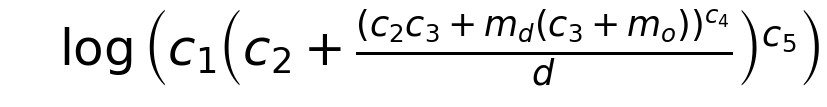

MCMC evolution


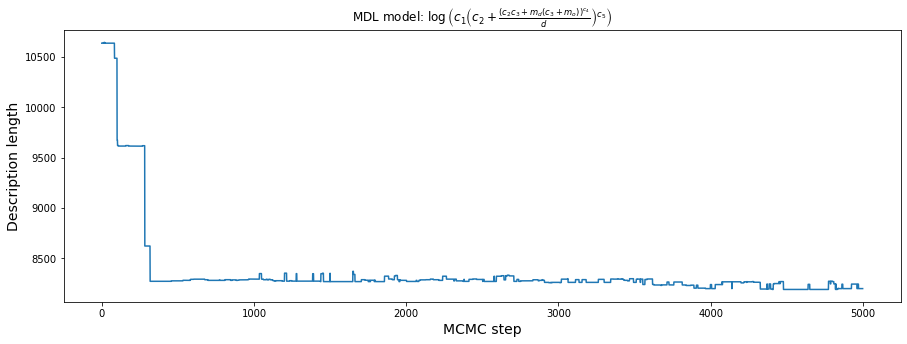

########################################
Lowest mdl for training data: 8192.76439428722
Model: log((((((((_a2_ * _a5_) + ((_a2_ + m_o) * m_d)) ** _a0_) / d) + _a5_) ** _a1_) * _a4_))
../Plots/data_dl_talk_NetSciX.pkl
CPU times: user 3h 35min 57s, sys: 2.73 s, total: 3h 36min
Wall time: 3h 36min


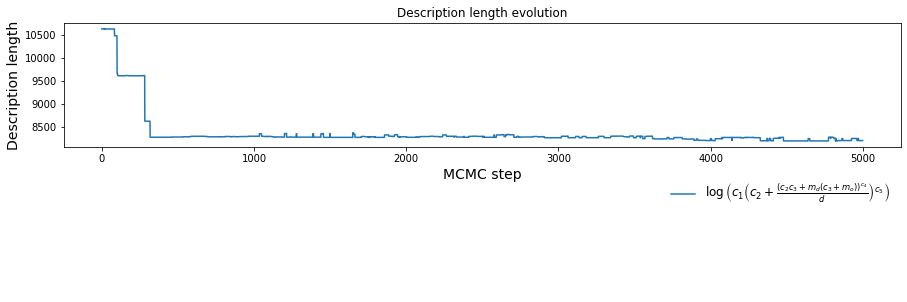

In [5]:
%%time
res={}



best_model, state_ensemble, dl_fig,data_talk = ms.machinescientist(x=train_list_sample,
                                               y={key:i['total_pop_flow'] for key,i in train_list_sample.items()},
                                               XLABS=XLABS,n_params=params,
                                               resets=mcmc_resets,
                                               steps_prod=mcmc_steps,
                                               log_scale_prediction=log_scale,
                                                ensemble_avg=mcmc_ens_avg
                                              )

"""
name=f'./City2City_DataFrames/{fold}_state_model_C_{datetime.now().strftime("%Y_%m_%d-%I_%M_%S")}.pkl'
with open(name, 'wb') as handle:
    pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(name)
name=f'./City2City_DataFrames/{fold}_ensemble_model_C_{datetime.now().strftime("%Y_%m_%d-%I_%M_%S")}.pkl'
with open(name, 'wb') as handle:
    pickle.dump(state_ensemble, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(name)
"""
dl_fig.show()